<h1 style="text-align: left;"> 1. Modelado </h1>



El objetivo de este proyecto es utilizar técnicas de Machine Learning para analizar y prevenir accidentes viales a partir de un conjunto de factores asociados.

   

*   Factores asociados a la ubicación geográfica (longitud, latitud, weather)
*   Factores asociados al vehículo (vehicle body type, vehicle year, vehicle make, vehicle model)
*   Factores asociados a la temporalidad del accidente (hour, day, month, year)





## Hipótesis

El uso de técnicas de Machine Learning es efectivo para determinar la probabilidad de la ocurrencia de accidentes viales a partir de variables asociadas como: localización del accidente, temporalidad del accidente y características del vehículo.

## Unidad de análisis

Está representada por cada accidente individual reportado en el dataset utilizado. Cada accidente representa una  𝑢𝑛𝑖𝑑𝑎𝑑  de  𝑐𝑜𝑛𝑑𝑖𝑐𝑖ó𝑛  única en torno a la cual se evaluarán sus diferentes características, por ejemplo: localización del accidente, temporalidad del accidente, características del conductor y características del vehículo.

Variable dependiente ( 𝑡𝑎𝑟𝑔𝑒𝑡 ): Low probability of accident o High probability of accident, indica la baja o alta probabilidad de ocurrencia de un accidente a partir de un conjunto de características. 


Variables independientes ( 𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠 ): 11 variables clasificadas como numéricas y categóricas.

## Ubicación de los datos

In [1]:
load_data = '../data//us_model_data_2020-11-11.csv'

## Importación de librerias

In [3]:
#Uso general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import fbeta_score
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#Pickle
import pickle
#Impresión de valores de variables
from IPython.display import Markdown
#Regresión Logística
from sklearn.linear_model import LogisticRegression
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
#RF Arbol
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from graphviz import Source
#Validación cruzada
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [4]:
#Cargar el dataset
df = pd.read_csv(load_data)

In [6]:
df

Latitude  Longitude  Vehicle Year Weather Vehicle Make  \
0       39.044760 -77.052257          2019   CLEAR        OTHER   
1       39.044760 -77.052257          2009   CLEAR        ACURA   
2       39.090453 -77.050633          2018   CLEAR       TOYOTA   
3       39.090453 -77.050633          2015   CLEAR        HONDA   
4       39.073533 -77.111992          2016   CLEAR        HONDA   
...           ...        ...           ...     ...          ...   
129235  39.917483 -77.376126          1996   CLEAR       TOYOTA   
129236  39.241855 -77.465440          1996   CLEAR        HONDA   
129237  39.073835 -77.138794          1995   CLEAR        ACURA   
129238  39.950775 -79.285751          2005  CLOUDY       NISSAN   
129239  38.711823 -77.592964          2000   CLEAR       NISSAN   

              Vehicle Body Type Vehicle Model      Month  Day  Year  Hour  \
0       (SPORT) UTILITY VEHICLE         OTHER  September   25  2019    11   
1                 PASSENGER CAR            4S  September   25  2019    11   
2                 PASSENGER CAR         CAMRY  September   25  2019     9   
3       (SPORT) UTILITY VEHICLE           CRV  September   25  2019     9   
4       (SPORT) UTILITY VEHICLE            TK  September   25  2019     9   
...                         ...           ...        ...  ...   ...   ...   
129235                    OTHER            4D       July   21  2015     3   
129236            PASSENGER CAR         OTHER      April    3  2015    13   
129237            PASSENGER CAR         CAMRY      March   26  2017    14   
129238            PASSENGER CAR         OTHER   November   17  2018    21   
129239            PASSENGER CAR         OTHER       July   14  2016    22   

             Probability of Accident  
0       High Probability of Accident  
1       High Probability of Accident  
2       High Probability of Accident  
3       High Probability of Accident  
4       High Probability of Accident  
...                              ...  
129235   Low Probability of Accident  
129236   Low Probability of Accident  
129237   Low Probability of Accident  
129238   Low Probability of Accident  
129239   Low Probability of Accident  

[129240 rows x 12 columns]

## Preprocesamiento:


Eliminamos la variable 'Month' para evitar el sesgo en el modelo, debido a que los resultados obtenidos en análisis previos mostraron que el modelo estaba sesgado por esta variable.  

In [ ]:
df = df.drop('Month', axis=1)

El dataset originalmente cuenta con clases desbalanceadas, teniendo la siguiente distribución de datos: 


*   89,249 con Alta Probabilidad de Accidente (High Probability of Accident)
*   40,000 con Baja Probabilidad de Accidente (Low Probability of Accident)

Debido a lo anterior, elegimos dos muestras de 20,000 datos para balancear las clases.


In [ ]:
baja_p = df[df['Probability of Accident']=='Low Probability of Accident']
alta_p = df[df['Probability of Accident']=='High Probability of Accident']
print(baja_p.shape)
print(alta_p.shape)

(40000, 11)
(89240, 11)


In [ ]:
cantidad = 20000
df = pd.concat([baja_p[:cantidad], alta_p[:cantidad]])

In [ ]:
df

Latitude  Longitude  ...  Hour       Probability of Accident
89240  39.311582 -75.980906  ...    15   Low Probability of Accident
89241  39.427226 -75.982090  ...    13   Low Probability of Accident
89242  38.654400 -77.216614  ...    20   Low Probability of Accident
89243  38.917592 -76.390354  ...     0   Low Probability of Accident
89244  39.873818 -77.592564  ...    10   Low Probability of Accident
...          ...        ...  ...   ...                           ...
19995  39.029676 -76.983469  ...     1  High Probability of Accident
19996  39.029676 -76.983469  ...     1  High Probability of Accident
19997  39.029676 -76.983469  ...     1  High Probability of Accident
19998  39.088047 -77.302830  ...     0  High Probability of Accident
19999  39.158575 -77.280157  ...     0  High Probability of Accident

[40000 rows x 11 columns]

## Tratamiento de variables categóricas

Cuando queremos cambiar los valores categóricos a variables o datos nominales se aplica la transformación de `OneHotEncoder` de **scikit-learn**. 

In [ ]:
df_tranformacion = df.drop('Probability of Accident', axis=1) #Sin la variable de predicción
#dividimos los tipos de variables
numeric_data = df_tranformacion._get_numeric_data().columns.values
all_data = df_tranformacion.columns.values
cartegorical_data = np.setdiff1d(all_data, numeric_data)

In [ ]:
cartegorical_data

array(['Vehicle Body Type', 'Vehicle Make', 'Vehicle Model', 'Weather'],
      dtype=object)

In [ ]:
numeric_data

array(['Latitude', 'Longitude', 'Vehicle Year', 'Day', 'Year', 'Hour'],
      dtype=object)

## Integración al _Pipeline_

Para integrar el procesamiento de los datos al _pipeline_ del modelo de _Machine Learning_ se estandarizan las variables numéricas. Aplicamos un `OneHotEncoder` y un `OrdinalEncoder` para las variables categóricas.

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_data),
        ('cat', categorical_transformer, cartegorical_data)])

### Regresión Logística

Aplicamos un clasificador de Regresión Logística debido a que éste es un método de regresión que permite estimar la probabilidad de una variable cualitativa binaria (presencia-ausencia / 1-0) en función de una variable cuantitativa (discreta o continua) o una combinación de variables cuantitativas y cualitativas. Las variables cualitativas pueden recodificarse en una variable dummy (Legendre, 2003).

In [ ]:
# Ajustamos la Regresión Logística a un conjunto de entrenamiento
classifier = LogisticRegression(random_state = 42) # Creando el objeto de regresión logística

In [ ]:
# Definir el Pipeline : Transformación  + modelo
model_logistic_reg = Pipeline(memory=None,
         steps=[('transformer',
                 transformer),
                ('classifier',
                 classifier)],
         verbose=False)

### Random Forest

Aplicamos un clasificador Random Forest ya que esta técnica de aprendizaje automático supervisada posee alta capacidad de generalización y está basada en árboles de decisión, y en este caso particular nos interesaba conocer cuales eran las variables que intervenian en la predicción.



In [ ]:
#Crear el clasificador Gaussiano
clf_random_forest=RandomForestClassifier(n_estimators=100, max_depth=8)

In [ ]:
# Definir el Pipeline : Transformación  + modelo
model_random_forest = Pipeline(memory=None,
         steps=[('transformer',
                 transformer),
                ('classifier',
                 clf_random_forest)],
         verbose=False)

## Transformación de la variable de predicción

Aplicamos la codificación de 0 y 1 para la variable Probability of Accident, dado que los valores tomados por los modelos seleccionados para este análisis deben ser de naturaleza numérica.

In [ ]:
#cambiar a 0's y 1's la variable Probability of Accident
pred_map = {'High Probability of Accident': 1, 'Low Probability of Accident': 0} 
df['Probability of Accident'] = df['Probability of Accident'].map(pred_map)

## Métodos de uso compartido

In [ ]:
#Obtener un data set con las variables categóricas codificadas
def encode_and_bind (original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode]) 
    res = pd.concat([dummies, original_dataframe], axis = 1)
    res = res.drop(features_to_encode, axis = 1) 
    return (res)

<h1 style="text-align: left;"> 1.2 Regresión logística </h1>


## Definición de variables

In [ ]:
#Separación de X y la variable de predicción
X = df.drop(['Probability of Accident'], axis=1)
y = df['Probability of Accident']

Dividiendo el dataset en conjunto de entrenamiento y evaluación

In [ ]:
# Entrenamiento con el 75% del dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

# Mostrando los resultados de la división
print("Set de entrenamiento tiene: {} muestras.".format(X_train.shape[0]))
print("Set de evaluación tiene: {} muestras.".format(X_test.shape[0]))

Set de entrenamiento tiene: 30000 muestras.
Set de evaluación tiene: 10000 muestras.


## **Modelado:** entrenamiento y predicción

In [ ]:
model_logistic_reg.fit(X_train, y_train) # Entrenamiento del modelo

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

In [ ]:
# Predicción de resultados del conjunto de evaluación
y_pred = model_logistic_reg.predict(X_test) # Generar predicción con Regresión Logística
print ('Accuracy del clasificador de regresión logística en el conjunto de prueba: {: .2f}'. format (model_logistic_reg.score (X_test, y_test))) 

Accuracy del clasificador de regresión logística en el conjunto de prueba:  0.82


## Variables de importancia

In [ ]:
feature_names = X.columns
coefs = model_logistic_reg.named_steps ["classifier"].coef_.flatten ()

In [ ]:
# Agrupar coeficientes y nombres juntos en un DataFrame
zipped = zip(feature_names, coefs)
df_names = pd.DataFrame(zipped, columns=["feature", "value"])
# Ordenar las variables por el valor absoluto de su coeficiente
df_names["abs_value"] = df_names["value"].apply(lambda x: abs(x))
df_names["colors"] = df_names["value"].apply(lambda x: "green" if x > 0 else "red")
df_names = df_names.sort_values("abs_value", ascending=False)
df_names

feature     value  abs_value colors
4       Vehicle Make  2.278983   2.278983  green
1          Longitude  0.660362   0.660362  green
2       Vehicle Year  0.411909   0.411909  green
0           Latitude -0.349568   0.349568    red
5  Vehicle Body Type  0.294333   0.294333  green
8               Year -0.260609   0.260609    red
7                Day  0.104928   0.104928  green
6      Vehicle Model  0.097017   0.097017  green
9               Hour -0.021323   0.021323    red
3            Weather -0.005537   0.005537    red

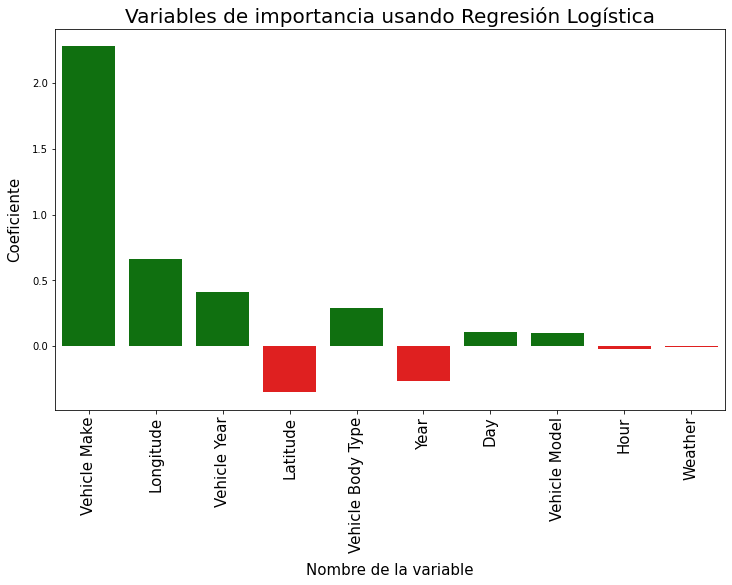

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df_names.head(20),
           palette=df_names.head(10)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=15)
ax.set_title("Variables de importancia usando Regresión Logística", fontsize=20)
ax.set_ylabel("Coeficiente", labelpad = 10, size = 15)
ax.set_xlabel("Nombre de la variable", labelpad = 10, size = 15)
plt.savefig("Feature_importance_rl.jpg", bbox_inches='tight')

**Interpretación de las variables de importancia:** 
*   En la imagen, las diferentes variables asociadas a un accidente están clasificadas de acuerdo a su importancia relativa. 
*   Podemos ver que las variables 'Vehicle Make', 'Longitude', 'Vehicle Year', 'Latitutde', 'Vehicle Body Type' y 'Year' tienen un impacto en el rendimiento general del modelo de Regresión Logística.
*   Al incluir las variables 'Vehicle Make', 'Longitude', 'Vehicle Year' y 'Vehicle Body Type' mejora el rendimiento del modelo de Regresión Logística
*   Al excluir las variables 'Latitude' y 'Year' mejora el rendimiento del modelo de Regresión Logística.



## **Evaluación del modelo**

### Matriz de confusión

In [ ]:
# Generar score del modelo (valores de 0 a 1)
model_logistic_reg.score(X_test, y_test)

0.8165

Cantidad de errores de clasificación sobre un total de 10000 casos: 1835


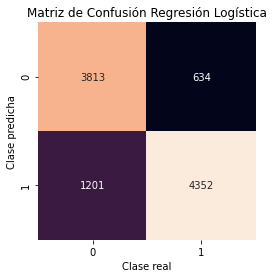

In [ ]:
# Elaborando la matriz de confusión
cm_rl = confusion_matrix(y_test, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_test.shape[0],(y_test != y_pred).sum()))
     
# Graficando la matriz de confusión
sns.heatmap(cm_rl.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase real')
plt.ylabel('Clase predicha')
plt.title('Matriz de Confusión Regresión Logística')
plt.savefig('Log_matrix')
plt.show()

In [ ]:
Markdown("""
**Interpretación de la matriz de confusión:**
* {TN} de los datos fueron clasificadas como verdaderos negativos (TN)
* {TP} de los datos fueron clasificadas como verdaderos positivos (TP)
* {FP} de los datos fueron clasisficadas como falsos positivos (FP)
* {FN} de los datos fueron clasificadas como falsos negativos (FN)
""".format(TN=cm_rl[0][0],TP=cm_rl[1][1],FP=cm_rl[0][1],FN= cm_rl[1][0]))


**Interpretación de la matriz de confusión:**
* 3813 de los datos fueron clasificadas como verdaderos negativos (TN)
* 4352 de los datos fueron clasificadas como verdaderos positivos (TP)
* 1201 de los datos fueron clasisficadas como falsos positivos (FP)
* 634 de los datos fueron clasificadas como falsos negativos (FN)


### Accuracy, precision, recall, F1-score, F-Beta score

In [ ]:
# Métricas para evaluar el modelo
accuracy_rl= metrics.accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy_rl)
precision_rl = metrics.precision_score(y_test,y_pred)
recall_rl = metrics.recall_score(y_test,y_pred)
f1_rl = metrics.f1_score(y_test,y_pred)

metrics_rl = classification_report(y_test, y_pred)
print(metrics_rl)

fbeta_score_rl = fbeta_score(y_test, y_pred, beta=2)
print(fbeta_score_rl)

Accuracy: 0.8165
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      5014
           1       0.78      0.87      0.83      4986

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

0.8534337373024277


**Interpretación:**

*   **Accuracy:** el modelo es capaz de clasificar en un 82% los casos con alta probabilidad de accidente. 
*   **Precision:** 78% de los casos con alta probablidad de accidente serán clasificados correctamente.
*   **Recall:** el modelo es capaz de identificar el 87% los casos con alta probabilidad de accidente. 
*   **F1 score:** el modelo es capaz de identificar en un 83% los casos con alta probabilidad de accidente.
*   **F-Beta score:** el modelo es capaz de identificar en un 85% los casos con alta probabilidad de accidente. Dándole más importancia a recall que a precisión, con β=2, debido a que nos interesa identificar casos con alta probabilidad de accidente.







### Curvas ROC y PRC

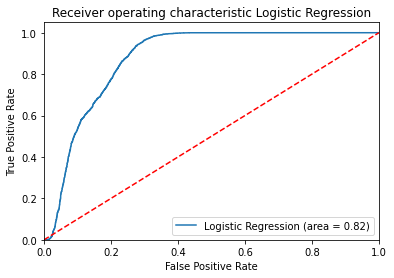

In [ ]:
#Graficar curva ROC
logit_roc_auc = roc_auc_score(y_test, model_logistic_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_logistic_reg.predict_proba(X_test)[:,1])
plt.figure(facecolor='white')
plt.axes().set_facecolor('white')
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Área Bajo la Curva: 0.78


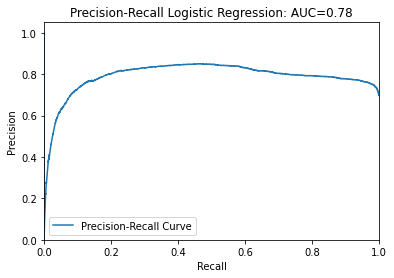

In [ ]:
# Calcular Precision-Recall y graficar la curva
precision, recall, thresholds = metrics.precision_recall_curve(y_test, model_logistic_reg.predict_proba(X_test)[:,1])
area_rl = metrics.auc(recall, precision)
print("Área Bajo la Curva: %0.2f" % area_rl)
plt.clf()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Logistic Regression: AUC=%0.2f' % area_rl)
plt.legend(loc="lower left")
plt.savefig('Log_PRC')
plt.show()

Interpretación:
*   La Curva ROC se empleo para evaluar el desempeño del modelo, se obtuvo un valor de 82%.
*   La Curva PRC se empleó debido a es de suma importancia detectar la alta probabilidad de accidente. Se obtuvo un valor de 78%.




<h1 style="text-align: left;"> 1.3 Random Forest Regression </h1>

## **Definición de variables**

In [ ]:
#Separaciòn de X y la variable de predicciòn
X = df.drop(['Probability of Accident'], axis=1)
y = df['Probability of Accident']


In [ ]:
# Dividiendo el dataset en conjunto de entrenamiento y evaluación

# Entrenamiento con el 75% del dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

# Mostrando los resultados del dataset dividido
print("Set de entrenamiento tiene: {} muestras.".format(X_train.shape[0]))
print("Set de evaluación tiene: {} muestras.".format(X_test.shape[0]))

Set de entrenamiento tiene: 30000 muestras.
Set de evaluación tiene: 10000 muestras.


## **Modelado:** entrenamiento y predicción

In [ ]:
#Entrenando el model usando conjuntos de entrenamiento 
model_random_forest.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

In [ ]:
# Prediciendo los valores
y_pred = model_random_forest.predict(X_test) # Generar predicción con Random Forest
print ('Accuracy del clasificador Random Forest en el conjunto de prueba: {: .2f}'. format (model_random_forest.score (X_test, y_test))) 

Accuracy del clasificador Random Forest en el conjunto de prueba:  0.97


## **Variables de importancia** 

In [ ]:
#Generar conjuntos de datos codificados
X_train_encoded = encode_and_bind (X_train, cartegorical_data.tolist())

In [ ]:
X_train_encoded

Vehicle Body Type_(SPORT) UTILITY VEHICLE  ...  Hour
107852                                          0  ...     5
14802                                           0  ...     9
10914                                           0  ...    10
108725                                          0  ...    17
7220                                            0  ...    14
...                                           ...  ...   ...
757                                             0  ...    19
12103                                           0  ...    19
10403                                           0  ...    17
1243                                            1  ...    14
91972                                           0  ...     8

[30000 rows x 47 columns]

In [ ]:
feature_names =X_train_encoded.columns
coefs = model_random_forest.named_steps["classifier"].feature_importances_

In [ ]:
# Agrupar coeficientes y nombres juntos en un DataFrame
zipped = zip(feature_names, coefs)
df_names = pd.DataFrame(zipped, columns=["feature", "value"])
# Ordenar las variables por valor absoluto de su coeficiente
df_names["abs_value"] = df_names["value"].apply(lambda x: abs(x))
df_names["colors"] = df_names["value"].apply(lambda x: "green" if x > 0 else "red")
df_names = df_names.sort_values("abs_value", ascending=False)
df_names

feature     value  abs_value colors
1                Vehicle Body Type_MOTORCYCLE  0.349045   0.349045  green
4              Vehicle Body Type_PICKUP TRUCK  0.284126   0.284126  green
0   Vehicle Body Type_(SPORT) UTILITY VEHICLE  0.272084   0.272084  green
2                     Vehicle Body Type_OTHER  0.039580   0.039580  green
5                Vehicle Body Type_SCHOOL BUS  0.037266   0.037266  green
20                        Vehicle Make_NISSAN  0.001757   0.001757  green
27                       Vehicle Model_ACCORD  0.001625   0.001625  green
3             Vehicle Body Type_PASSENGER CAR  0.001265   0.001265  green
9                           Vehicle Make_AUDI  0.001108   0.001108  green
29                          Vehicle Model_BUS  0.000878   0.000878  green
40                               Weather_SNOW  0.000793   0.000793  green
42                                  Longitude  0.000790   0.000790  green
37                             Weather_CLOUDY  0.000656   0.000656  green
35                           Vehicle Model_TK  0.000648   0.000648  green
8                          Vehicle Make_ACURA  0.000596   0.000596  green
36                              Weather_CLEAR  0.000567   0.000567  green
41                                   Latitude  0.000545   0.000545  green
45                                       Year  0.000530   0.000530  green
12                      Vehicle Make_CHRYSLER  0.000514   0.000514  green
6               Vehicle Body Type_TRANSIT BUS  0.000449   0.000449  green
10                           Vehicle Make_BMW  0.000447   0.000447  green
21                         Vehicle Make_OTHER  0.000415   0.000415  green
11                     Vehicle Make_CHEVROLET  0.000407   0.000407  green
33                          Vehicle Model_CRV  0.000390   0.000390  green
32                      Vehicle Model_COROLLA  0.000292   0.000292  green
19                 Vehicle Make_MERCEDES-BENZ  0.000290   0.000290  green
43                               Vehicle Year  0.000270   0.000270  green
38                              Weather_OTHER  0.000244   0.000244  green
26                           Vehicle Model_4S  0.000226   0.000226  green
44                                        Day  0.000210   0.000210  green
13                         Vehicle Make_DODGE  0.000209   0.000209  green
39                            Weather_RAINING  0.000180   0.000180  green
17                           Vehicle Make_KIA  0.000174   0.000174  green
34                        Vehicle Model_OTHER  0.000166   0.000166  green
22                        Vehicle Make_SUBARU  0.000165   0.000165  green
25                           Vehicle Model_4D  0.000149   0.000149  green
28                       Vehicle Model_ALTIMA  0.000141   0.000141  green
23                        Vehicle Make_TOYOTA  0.000132   0.000132  green
7                       Vehicle Body Type_VAN  0.000116   0.000116  green
16                          Vehicle Make_JEEP  0.000093   0.000093  green
46                                       Hour  0.000091   0.000091  green
31                        Vehicle Model_CIVIC  0.000086   0.000086  green
18                         Vehicle Make_MAZDA  0.000076   0.000076  green
30                        Vehicle Model_CAMRY  0.000069   0.000069  green
14                         Vehicle Make_HONDA  0.000058   0.000058  green
15                       Vehicle Make_HYUNDAI  0.000046   0.000046  green
24                         Vehicle Make_VOLVO  0.000037   0.000037  green

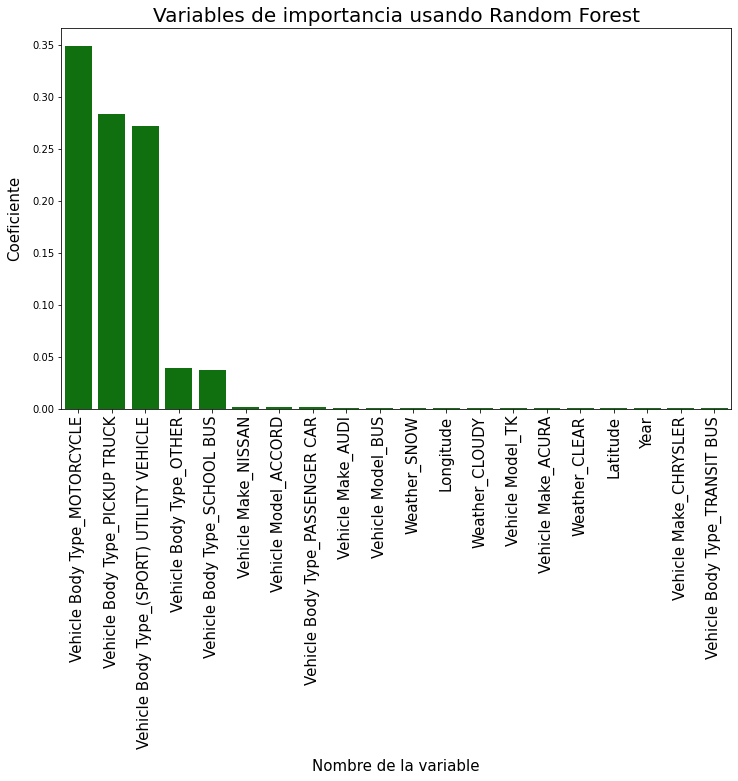

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df_names.head(20),
           palette=df_names.head(10)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=15)
ax.set_title("Variables de importancia usando Random Forest", fontsize=20)
ax.set_ylabel("Coeficiente", labelpad = 10, size = 15)
ax.set_xlabel("Nombre de la variable", labelpad = 10, size = 15)
plt.savefig("Feature_importance_rf.jpg", bbox_inches='tight')


**Interpretación de las variables de importancia:** 
*   En la imagen, las diferentes variables asociadas a un accidente están clasificadas de acuerdo a su importancia relativa. 
*   Podemos ver que la variable 'Vehicle Body Type' tiene un impacto en el rendimiento general del modelo de Random Forest. 
*   La importancia positiva de esta variable significa que el rendimiento del modelo Random Forest mejorará si la incluimos en el modelo.







## Evaluación del modelo

### Matriz de confusión

Cantidad de errores de clasificación sobre un total de 10000 casos: 265


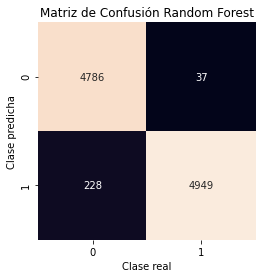

In [ ]:
# Realizando la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred)
print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_test.shape[0],(y_test != y_pred).sum()))

# Graficando la matriz de confusión
sns.heatmap(cm_rf.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase real')
plt.ylabel('Clase predicha')
plt.title('Matriz de Confusión Random Forest')
plt.savefig('rf_matrix')
plt.show()

In [ ]:
Markdown("""
**Interpretación de la matriz de confusión:**
* {TN} de los datos fueron clasificadas como verdaderos negativos (TN)
* {TP} de los datos fueron clasificadas como verdaderos positivos (TP)
* {FP} de los datos fueron clasisficadas como falsos positivos (FP)
* {FN} de los datos fueron clasificadas como falsos negativos (FN)
""".format(TN=cm_rf[0][0],TP=cm_rf[1][1],FP=cm_rf[0][1],FN= cm_rf[1][0]))


**Interpretación de la matriz de confusión:**
* 4786 de los datos fueron clasificadas como verdaderos negativos (TN)
* 4949 de los datos fueron clasificadas como verdaderos positivos (TP)
* 228 de los datos fueron clasisficadas como falsos positivos (FP)
* 37 de los datos fueron clasificadas como falsos negativos (FN)


### Accuracy, precision, recall, F1-score, F-Beta score

In [ ]:
# Métricas para evaluar el modelo
accuracy_rf = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_rf)
precision_rf = metrics.precision_score(y_test,y_pred)
recall_rf = metrics.recall_score(y_test,y_pred)
f1_rf = metrics.f1_score(y_test,y_pred)

metrics_rf = classification_report(y_test, y_pred)
print(metrics_rf)

from sklearn.metrics import fbeta_score
fbeta_score_rf = fbeta_score(y_test, y_pred, beta=2)
print(fbeta_score_rf)

Accuracy: 0.9735
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      5014
           1       0.96      0.99      0.97      4986

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

0.985032442975996


**Interpretación:**

*   **Accuracy:** el modelo es capaz de clasificar en un 97% los casos con alta probabilidad de accidente. 
*   **Precision:** 96% de los casos con alta probablidad de accidente serán clasificados correctamente.
*   **Recall:** el modelo es capaz de identificar el 99% los casos con alta probabilidad de accidente. 
*   **F1 score:** el modelo es capaz de identificar en un 97% los casos con alta probabilidad de accidente.
*   **F-Beta score:** el modelo es capaz de identificar en un 98% los casos con alta probabilidad de accidente. Dándole más importancia a recall que a precisión, con β=2, , debido a que nos interesa identificar casos con alta probabilidad de accidente.







### Curva ROC y PRC

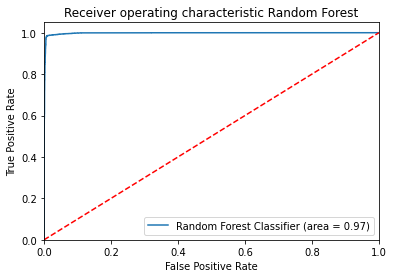

In [ ]:
rf_roc_auc = roc_auc_score(y_test, model_random_forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_random_forest.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Random Forest')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()



Área Bajo la Curva: 1.00


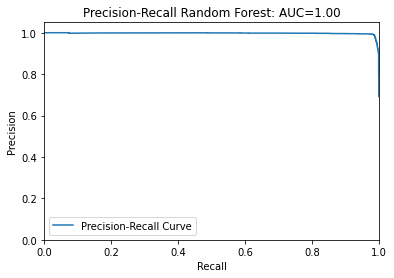

In [ ]:
# Calcular Precision-Recall y graficar la curva
precision, recall, thresholds = metrics.precision_recall_curve(y_test, model_random_forest.predict_proba(X_test)[:,1])
area_rf = metrics.auc(recall, precision)
print("Área Bajo la Curva: %0.2f" % area_rf)
plt.clf()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Random Forest: AUC=%0.2f' % area_rf)
plt.legend(loc="lower left")
plt.savefig('rf_PRC')
plt.show()

Interpretación:
*   La Curva ROC se empleó para evaluar el desempeño del modelo, se obtuvo un valor de 97%.
*   La Curva PRC se empleó debido a es de suma importancia detectar la alta probabilidad de  accidente. Se obtuvo un valor de 1%.




## **Visualización de resultados**

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.172522 to fit


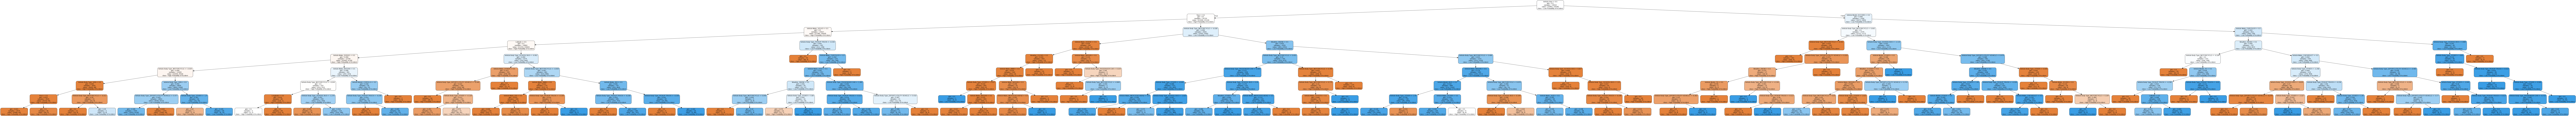

In [ ]:
estimator = model_random_forest.named_steps['classifier'].estimators_[0]
#Generar imagen del estimador 0
dot_data = tree.export_graphviz(estimator, out_file='fr_tree0.dot', 
                rounded = True,feature_names = feature_names, max_depth = 8,
                class_names = ['High Probability of Accident','Low Probability of Accident'], filled = True)

!dot -Tpng fr_tree0.dot -o fr_tree0.png -Gdpi=600
Image('fr_tree0.png')

In [ ]:
#Generar pdf del estimador 0
dot_data = tree.export_graphviz(estimator,
                                class_names = ['High Probability of Accident','Low Probability of Accident'],
                                rounded = True, max_depth = 8,feature_names = feature_names,
                                out_file=None) 
graph = Source(dot_data)
graph.render("rf_tree0")

'rf_tree0.pdf'

<h1 style="text-align: left;"> 1.4 Selección del modelo </h1>


## Comparación de modelos

In [ ]:
#Comparar

print('*** MODELO 1- Logistic Regression ***')
print("Accuracy: {} \nROC_AUC: {} \n\nConfusion Matrix: \n{} \n\nClassification Report: \n{}".format(accuracy_rl,logit_roc_auc,cm_rl,metrics_rl))
print("\n\n-------------------------------------------------------\n\n")
print('*** MODELO 2- Random Forest Regression ***')
print("Accuracy: {} \nROC_AUC: {} \n\nConfusion Matrix: \n{} \n\nClassification Report: \n{}".format(accuracy_rf,rf_roc_auc,cm_rf,metrics_rf))

*** MODELO 1- Logistic Regression ***
Accuracy: 0.8165 
ROC_AUC: 0.8166573225934092 

Confusion Matrix: 
[[3813 1201]
 [ 634 4352]] 

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      5014
           1       0.78      0.87      0.83      4986

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



-------------------------------------------------------


*** MODELO 2- Random Forest Regression ***
Accuracy: 0.9735 
ROC_AUC: 0.9735532726576576 

Confusion Matrix: 
[[4786  228]
 [  37 4949]] 

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      5014
           1       0.96      0.99      0.97      4986

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0

## Validación cruzada

### Regresión Logística

Para la validación, evaluamos los modelos con un conjunto de datos de entrenamiento, usando la técnica de validación cruzada (K folds = 10).

In [ ]:
from sklearn.model_selection import cross_val_score

scores_cv_rl = cross_val_score(estimator=model_logistic_reg,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('accuracy_cv_rl: %s' % scores_cv_rl)
print('accuracy_cv_rl: %.3f +/- %.3f' % (np.mean(scores_cv_rl), np.std(scores_cv_rl)))

accuracy_cv_rl: [0.81833333 0.83266667 0.81266667 0.81366667 0.81666667 0.818
 0.817      0.82433333 0.81866667 0.81      ]
accuracy_cv_rl: 0.818 +/- 0.006


In [ ]:
precision_cv_rl = cross_val_score(estimator=model_logistic_reg,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1, scoring='precision')
print('precision_cv_rl scores: %s' % precision_cv_rl)
print('precision_cv_rl: %.3f +/- %.3f' % (np.mean(precision_cv_rl), np.std(precision_cv_rl)))

precision_cv_rl scores: [0.78284024 0.79785331 0.78402904 0.78373494 0.78421996 0.78644271
 0.78346222 0.79743746 0.78751501 0.77904192]
precision_cv_rl: 0.787 +/- 0.006


In [ ]:
recall_cv_rl = cross_val_score(estimator=model_logistic_reg,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1, scoring='recall')
print('recall_cv_rl scores: %s' % recall_cv_rl)
print('recall_cv_rl: %.3f +/- %.3f' % (np.mean(recall_cv_rl), np.std(recall_cv_rl)))

recall_cv_rl scores: [0.88141239 0.89140573 0.86342438 0.8667555  0.87408394 0.87341772
 0.87683089 0.8701731  0.873502   0.86617843]
recall_cv_rl: 0.874 +/- 0.008


In [ ]:
f1_cv_rl = cross_val_score(estimator=model_logistic_reg,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1, scoring='f1')
print('f1_cv_rl scores: %s' % recall_cv_rl)
print('f1_cv_rl: %.3f +/- %.3f' % (np.mean(f1_cv_rl), np.std(f1_cv_rl)))

f1_cv_rl scores: [0.88141239 0.89140573 0.86342438 0.8667555  0.87408394 0.87341772
 0.87683089 0.8701731  0.873502   0.86617843]
f1_cv_rl: 0.828 +/- 0.006


In [ ]:
roc_auc_cv_rl = cross_val_score(estimator=model_logistic_reg,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1, scoring='roc_auc')
print('roc_auc_cv_rl scores: %s' % recall_cv_rl)
print('roc_auc_cv_rl: %.3f +/- %.3f' % (np.mean(roc_auc_cv_rl), np.std(roc_auc_cv_rl)))

roc_auc_cv_rl scores: [0.88141239 0.89140573 0.86342438 0.8667555  0.87408394 0.87341772
 0.87683089 0.8701731  0.873502   0.86617843]
roc_auc_cv_rl: 0.879 +/- 0.005


### Random Forest

Para la validación, evaluamos los modelos con un conjunto de datos de entrenamiento, usando la técnica de validación cruzada (K folds = 10).

In [ ]:
from sklearn.model_selection import cross_val_score

scores_cv_rf = cross_val_score(estimator=model_random_forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('accuracy_cv_rf: %s' % scores_cv_rf)
print('accuracy_cv_rf: %.3f +/- %.3f' % (np.mean(scores_cv_rf), np.std(scores_cv_rf)))

accuracy_cv_rf: [0.97533333 0.982      0.968      0.97833333 0.97333333 0.97166667
 0.976      0.98033333 0.97733333 0.974     ]
accuracy_cv_rf: 0.976 +/- 0.004


In [ ]:
precision_cv_rf = cross_val_score(estimator=model_random_forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1, scoring='precision')
print('precision_cv_rf scores: %s' % precision_cv_rf)
print('precision_cv_rf: %.3f +/- %.3f' % (np.mean(precision_cv_rf), np.std(precision_cv_rf)))

precision_cv_rf scores: [0.95262484 0.96826425 0.95253368 0.96632124 0.95761079 0.95822622
 0.96250808 0.96260477 0.95948553 0.95870968]
precision_cv_rf: 0.960 +/- 0.005


In [ ]:
recall_cv_rf = cross_val_score(estimator=model_random_forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1, scoring='recall')
print('recall_cv_rf scores: %s' % recall_cv_rf)
print('recall_cv_rf: %.3f +/- %.3f' % (np.mean(recall_cv_rf), np.std(recall_cv_rf)))

recall_cv_rf scores: [0.99267155 0.99666889 0.99067288 0.99467022 0.99333777 0.994004
 0.99001332 0.99400799 0.99467377 0.98934754]
recall_cv_rf: 0.993 +/- 0.002


In [ ]:
f1_cv_rf = cross_val_score(estimator=model_random_forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1, scoring='f1')
print('f1_cv_rf scores: %s' % recall_cv_rf)
print('f1_cv_rf: %.3f +/- %.3f' % (np.mean(f1_cv_rf), np.std(f1_cv_rf)))

f1_cv_rf scores: [0.99267155 0.99666889 0.99067288 0.99467022 0.99333777 0.994004
 0.99001332 0.99400799 0.99467377 0.98934754]
f1_cv_rf: 0.974 +/- 0.002


In [ ]:
roc_auc_cv_rf = cross_val_score(estimator=model_random_forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1, scoring='roc_auc')
print('roc_auc_cv_rf scores: %s' % recall_cv_rf)
print('roc_auc_cv_rf: %.3f +/- %.3f' % (np.mean(roc_auc_cv_rf), np.std(roc_auc_cv_rf)))

roc_auc_cv_rf scores: [0.99267155 0.99666889 0.99067288 0.99467022 0.99333777 0.994004
 0.99001332 0.99400799 0.99467377 0.98934754]
roc_auc_cv_rf: 0.998 +/- 0.001


### Datos de evaluación

Evaluamos los modelos de manera cuantitativa a través de la comparación de las métricas: accuracy, precisión, recall, F1 score, F-Beta score, ROC AUC y PRC AUC. Observamos que ambos modelos obtuvieron métricas altas, siendo el modelo random forest el que obtuvo los mejores valores. 

In [ ]:
# Datos de evaluación
#list_model = ['Regresión Logística', 'Regresión Logística CV','Random Forest','Random Forest CV']
list_accuracy = ['Accuracy',accuracy_rl, np.mean(scores_cv_rl), accuracy_rf, np.mean(scores_cv_rf)]
list_precision = ['Precision',precision_rl, np.mean(precision_cv_rl), precision_rf, np.mean(precision_cv_rf)]
list_recall = ['Recall',recall_rl, np.mean(recall_cv_rl), recall_rf, np.mean(recall_cv_rf)]
list_f1 = ['f1 score',f1_rl, np.mean(f1_cv_rl), f1_rf, np.mean(f1_cv_rf)]
list_f_beta_score = ['f-beta score',fbeta_score_rl, "-", fbeta_score_rf, "-"]
list_roc_auc = ['ROC AUC',logit_roc_auc, np.mean(roc_auc_cv_rl), rf_roc_auc, np.mean(roc_auc_cv_rf)]
list_prc_auc = ['PRC AUC',area_rl, "-", area_rf, "-"]

comparativa_modelos = pd.DataFrame(columns=('Métrica','Regresión Logística', 'Regresión Logística CV','Random Forest','Random Forest CV'))
comparativa_modelos.loc[len(comparativa_modelos)] = list_accuracy 
comparativa_modelos.loc[len(comparativa_modelos)] = list_precision
comparativa_modelos.loc[len(comparativa_modelos)] = list_recall
comparativa_modelos.loc[len(comparativa_modelos)] = list_f1
comparativa_modelos.loc[len(comparativa_modelos)] = list_f_beta_score
comparativa_modelos.loc[len(comparativa_modelos)] = list_roc_auc
comparativa_modelos.loc[len(comparativa_modelos)] = list_prc_auc

In [ ]:
comparativa_modelos

Métrica  Regresión Logística  ... Random Forest  Random Forest CV
0      Accuracy             0.816500  ...      0.973500          0.975633
1     Precision             0.783721  ...      0.955959          0.959889
2        Recall             0.872844  ...      0.992579          0.993007
3      f1 score             0.825885  ...      0.973925          0.974229
4  f-beta score             0.853434  ...      0.985032                 -
5       ROC AUC             0.816657  ...      0.973553          0.997928
6       PRC AUC             0.784905  ...      0.997506                 -

[7 rows x 5 columns]

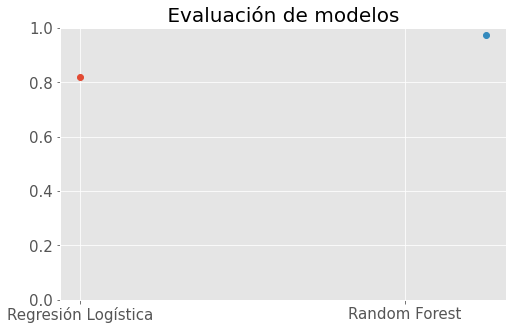

In [ ]:
# Agregamos una grafica para comparar visualmente los resultados
list_std = [np.std(scores_cv_rl), np.std(scores_cv_rf)]
list_mean = [np.mean(scores_cv_rl), np.mean(scores_cv_rf)]

with plt.style.context('ggplot'):
    plt.figure(figsize=(8,5))
    for i in range(2):
        plt.errorbar(i, list_mean[i], xerr=0, yerr=list_std[i], fmt='o', linewidth = 3)
    plt.xticks( [0,0.8], ['Regresión Logística', 'Random Forest'] )
    plt.title(' Evaluación de modelos ', size = 20)
    plt.ylim( 0,1 )
    plt.tick_params( labelsize = 15 )

plt.show()

<h1 style="text-align: left;"> 1.5 Calibración del modelo (Tuning) </h1>


## Tuning

Considerando que obtuvimos las mejores métricas para el random forest, decidimos ajustar (tunear) el modelo utilizando la función Randomized Search, con la cual obtuvimos los mejores hiperparámetros para dicho modelo. Cabe resaltar que debido a la naturaleza del modelo random forest, se obtienen diferentes hiperparámetros y métricas en cada entrenamiento. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 50)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]   # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 10]    # Minimum number of samples required at each leaf node
bootstrap = [True, False]       # Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1)
rf_random = RandomizedSearchCV(
                estimator = rf,
                param_distributions = random_grid,
                n_iter = 50, cv = 3,
                verbose=1,
                scoring='roc_auc')
#pipe_random = make_pipeline(col_trans, rf_random)
pipe_random = Pipeline(memory=None,
         steps=[('transformer',
                 transformer),
                ('classifier',
                 rf_random)],
         verbose=False)
pipe_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/usr/local/lib/p

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': 41,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 246}

## Evaluación del mejor modelo

In [ ]:
# Usar el mejor modelo después del tuning
best_model = rf_random.best_estimator_
pipe_best_model = Pipeline(memory=None,
                            steps=[('transformer',
                                    transformer),
                                    ('classifier',
                                    best_model)],
                            verbose=False)#make_pipeline(col_trans, best_model)
pipe_best_model.fit(X_train, y_train)
y_pred_best_model = pipe_best_model.predict(X_test)

In [ ]:
#Visualizar los nodos y profundidades de los árboles (Promedio)
n_nodes = []
max_depths = []
for ind_tree in best_model.estimators_:
       n_nodes.append(ind_tree.tree_.node_count)
       max_depths.append(ind_tree.tree_.max_depth)
print(f'Average number of nodes {int(np.mean(n_nodes))}')   
print(f'Average maximum depth {int(np.mean(max_depths))}') 

Average number of nodes 81
Average maximum depth 12


### Matriz de confusión

Cantidad de errores de clasificación sobre un total de 10000 casos: 271


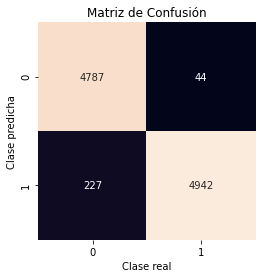

In [ ]:
# Realizando la matriz de confusión
cm_rf_random = confusion_matrix(y_test, y_pred_best_model)
print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_test.shape[0],(y_test != y_pred_best_model).sum()))

# Graficando la matriz de confusión
sns.heatmap(cm_rf_random.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase real')
plt.ylabel('Clase predicha')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
Markdown("""
**Interpretación de la matriz de confusión:**
* {TN} de los datos fueron clasificadas como verdaderos negativos (TN)
* {TP} de los datos fueron clasificadas como verdaderos positivos (TP)
* {FP} de los datos fueron clasisficadas como falsos positivos (FP)
* {FN} de los datos fueron clasificadas como falsos negativos (FN)
""".format(TN=cm_rf_random[0][0],TP=cm_rf_random[1][1],FP=cm_rf_random[0][1],FN= cm_rf_random[1][0]))


**Interpretación de la matriz de confusión:**
* 4787 de los datos fueron clasificadas como verdaderos negativos (TN)
* 4942 de los datos fueron clasificadas como verdaderos positivos (TP)
* 227 de los datos fueron clasisficadas como falsos positivos (FP)
* 44 de los datos fueron clasificadas como falsos negativos (FN)


### Accuracy, precision, recall, F1-score, F-Beta score

In [ ]:
# Métricas para evaluar el modelo
accuracy_rf_random = metrics.accuracy_score(y_test,y_pred_best_model)
print("Accuracy:",accuracy_rf_random)
precision_rf_random = metrics.precision_score(y_test,y_pred_best_model)
recall_rf_random = metrics.recall_score(y_test,y_pred_best_model)
f1_rf_random = metrics.f1_score(y_test,y_pred_best_model)

metrics_rf_random = classification_report(y_test, y_pred_best_model)
print(metrics_rf_random)

from sklearn.metrics import fbeta_score
fbeta_score_rf_random = fbeta_score(y_test, y_pred_best_model, beta=2)
print(fbeta_score_rf_random)

Accuracy: 0.9729
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      5014
           1       0.96      0.99      0.97      4986

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

0.9839525345438619


**Interpretación:**

*   **Accuracy:** el modelo es capaz de clasificar en un 97% los casos con alta probabilidad de accidente. 
*   **Precision:** 96% de los casos con alta probablidad de accidente serán clasificados correctamente.
*   **Recall:** el modelo es capaz de identificar el 99% los casos con alta probabilidad de accidente. 
*   **F1 score:** el modelo es capaz de identificar en un 97% los casos con alta probabilidad de accidente.
*   **F-Beta score:** el modelo es capaz de identificar en un 98% los casos con alta probabilidad de accidente. Dándole más importancia a recall que a precisión, con β=2, , debido a que nos interesa identificar casos con alta probabilidad de accidente.

### Curva ROC y PRC

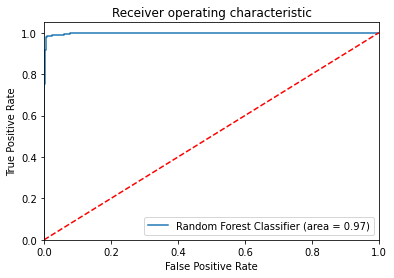

In [ ]:
rf_roc_auc_random = roc_auc_score(y_test, pipe_best_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, pipe_best_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc_random)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Área Bajo la Curva: 1.00


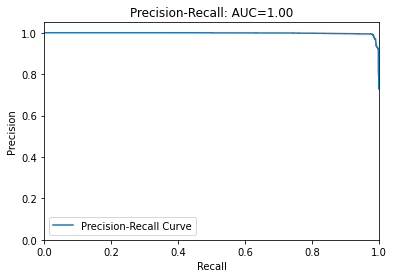

In [ ]:
# Calcular Precision-Recall y graficar la curva
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pipe_best_model.predict_proba(X_test)[:,1])
area_rf_random = metrics.auc(recall, precision)
print("Área Bajo la Curva: %0.2f" % area_rf_random)
plt.clf()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AUC=%0.2f' % area_rf_random)
plt.legend(loc="lower left")
plt.show()

Interpretación:
*   La Curva ROC se empleó para evaluar el desempeño del modelo, se obtuvo un valor de 97%.
*   La Curva PRC se empleó debido a es de suma importancia detectar la alta probabilidad de  accidente. Se obtuvo un valor de 1%.

## **Almacenamiento del modelo con pickle** 

Si nos gustaría usar el clasificador en otro lugar, o simplemente no entrenarlo una y otra vez cada vez, podemos guardar el modelo en un archivo pickle:

In [ ]:
# Guardar el modelo con mejor desempeño en un archivo
pkl_filename = "pickle_model_random_forest_best_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pipe_best_model, file)

In [ ]:
# Cargar el modelo desde el archivo generado
with open(pkl_filename, 'rb') as file:
    mp = pickle.load(file)

In [ ]:
#Entrenamiento de prueba para verificar la carga del modelo desde el archivo
mp.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
score = mp.score(X_test, y_test)
print ('Score: ', round(score, 2))

Score:  0.97


Diagnóstico de problemas de sesgo y varianza

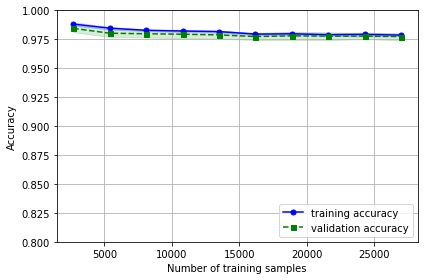

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_best_model = Pipeline(memory=None,
                            steps=[('transformer',
                                    transformer),
                                    ('classifier',
                                    best_model)],
                            verbose=False)

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_best_model,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validati accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()